# Telco Customer Churn

https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit

https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction/notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('./DATA/Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_raw.shape

(7043, 21)

In [4]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
## dtypes, missing values of all fields
## remove missing values
## get dummies for categorical
## binarise target
## correlation
## class distribution
## pie chart distribution of object fields by churn yes vs churn no
## kde plot for numeric / int fields by churn yes vs no

In [5]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df_stg = df_raw.copy()

In [7]:
df_stg.TotalCharges = pd.to_numeric(df_stg.TotalCharges, errors='coerce')

In [8]:
df_stg.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df_stg = df_stg.dropna()

In [10]:
df_stg = df_stg[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [12]:
df_stg_bin = df_stg.copy()
df_stg_bin['Churn'] = df_stg_bin['Churn'].replace(to_replace='Yes', value=1)
df_stg_bin['Churn'] =  df_stg_bin['Churn'].replace(to_replace='No',  value=0)
df_stg_bin = pd.get_dummies(df_stg_bin)
df_stg_bin.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


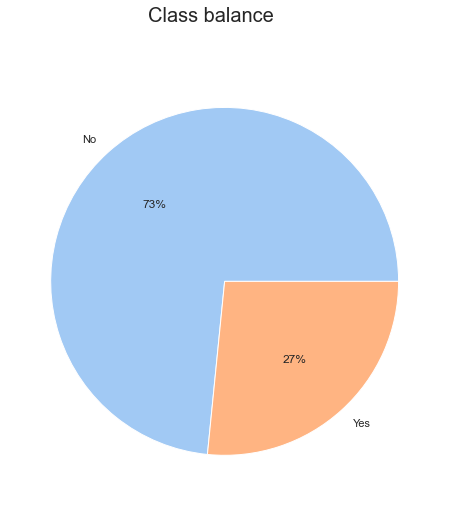

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})

df_temp = df_stg["Churn"].value_counts().to_frame().reset_index()
plt.suptitle('Class balance', fontsize=20)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df_temp["Churn"], labels = df_temp["index"], colors = colors, autopct='%.0f%%')
plt.show()

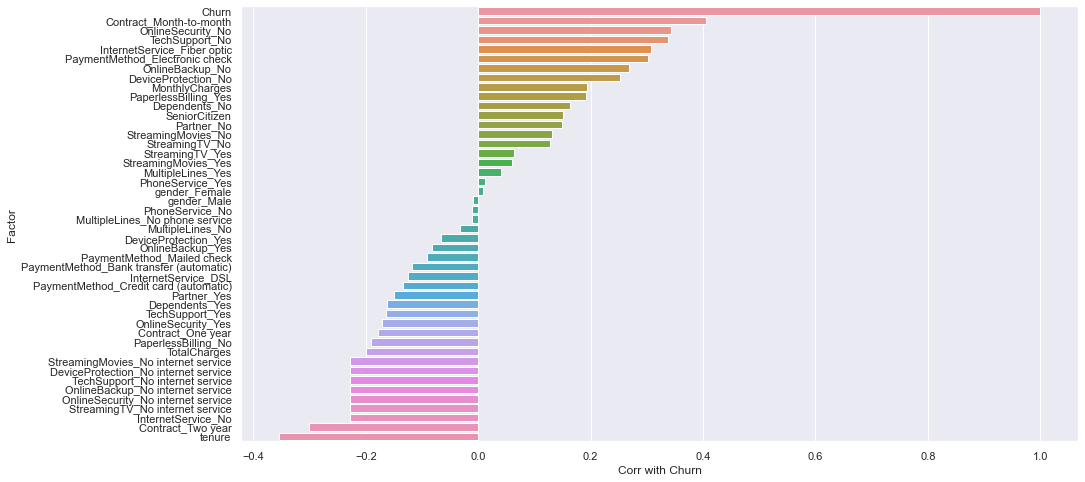

In [14]:
df_corrs_x_y = df_stg_bin.corr()['Churn'].sort_values(ascending = False).to_frame().reset_index().rename(columns={"index": "Factor", "Churn": "Corr with Churn"})
ax = sns.barplot(x="Corr with Churn", y="Factor", data=df_corrs_x_y)

Customers who churn tend to have monthly contracts, and also do not have online security or tech support.

Those who are retained tend to have longer tenures and are on two year contracts.

In [15]:
df_stg[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Numeric factors have different ranges, and will need to be scaled

<AxesSubplot:xlabel='tenure', ylabel='Density'>

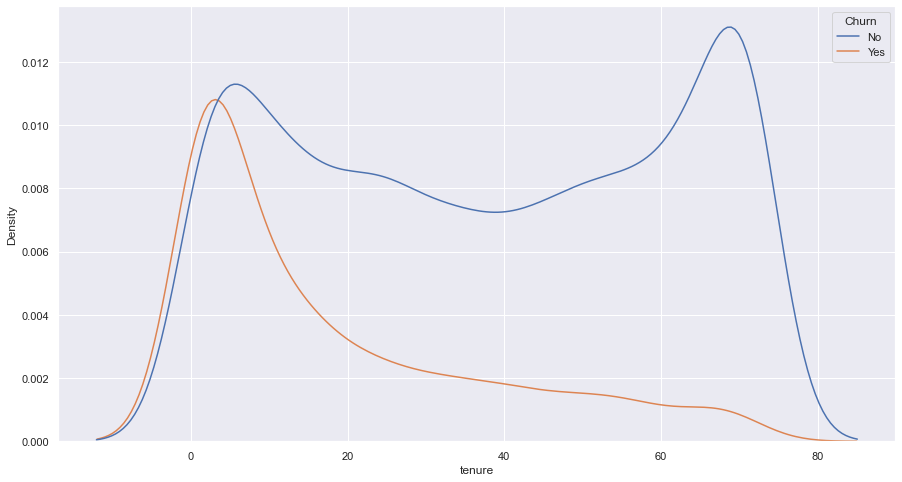

In [16]:
sns.kdeplot(data=df_stg, x="tenure", hue="Churn")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

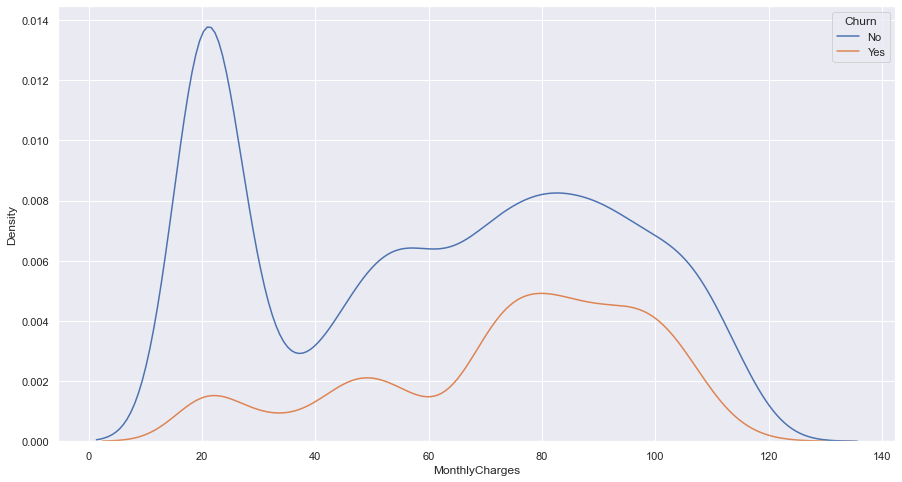

In [17]:
sns.kdeplot(data=df_stg, x="MonthlyCharges", hue="Churn")

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

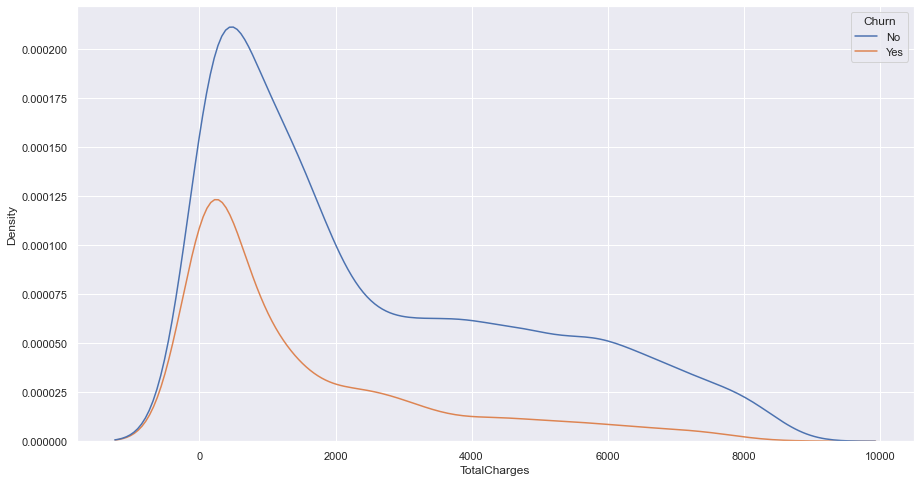

In [18]:
sns.kdeplot(data=df_stg, x="TotalCharges", hue="Churn")

From the above, we see that those who don't churn tend to have longer tenures. Furthermore, of the customers who churn, we see more cases of higher monthly charges.

In [19]:
df_stg.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0, 0.5, 'Ratio of Senior Citizens for Churn = No')

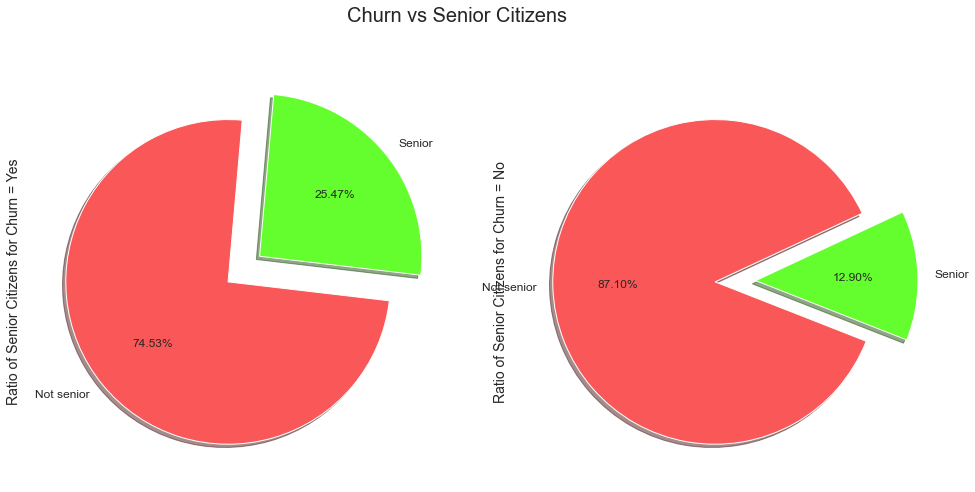

In [38]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "Not senior" ,"Senior"

plt.suptitle('Churn vs Senior Citizens', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["SeniorCitizen"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=85)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of Senior Citizens for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["SeniorCitizen"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of Senior Citizens for Churn = No', fontsize=14)

The proportion of senior citizens in the sample of churned customers is about double that of retained customers.

In [51]:
df_stg["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Text(0, 0.5, 'Ratio of Partner for Churn = No')

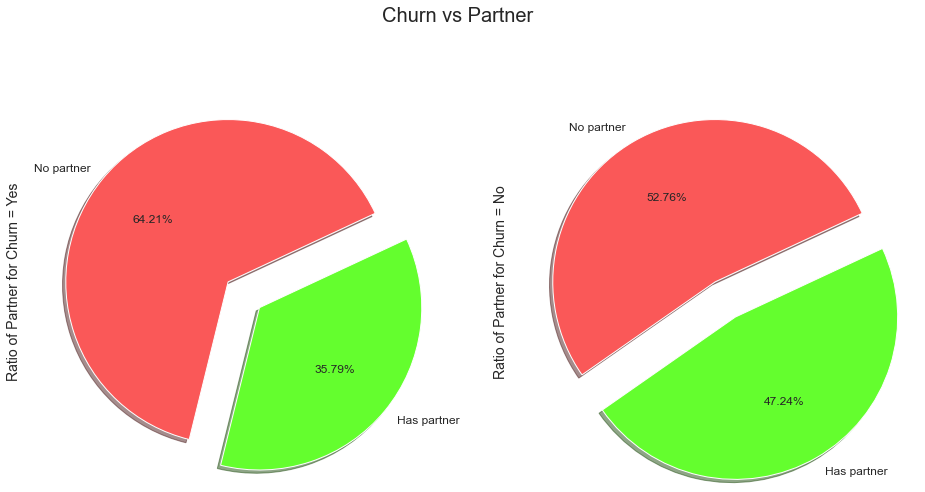

In [40]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "No partner" ,"Has partner"

plt.suptitle('Churn vs Partner', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["Partner"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of Partner for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["Partner"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of Partner for Churn = No', fontsize=14)

Text(0, 0.5, 'Ratio of Dependents for Churn = No')

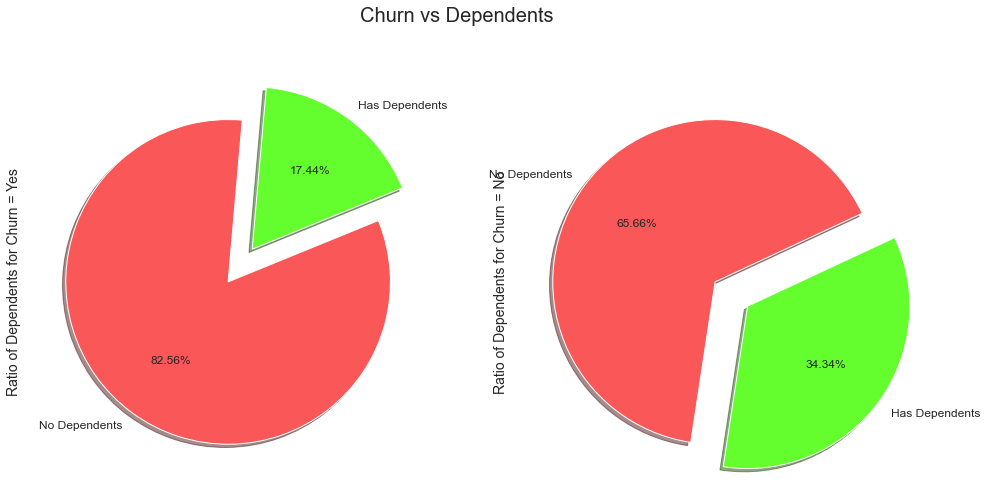

In [36]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "No Dependents" ,"Has Dependents"

plt.suptitle('Churn vs Dependents', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["Dependents"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=85)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of Dependents for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["Dependents"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of Dependents for Churn = No', fontsize=14)

Text(0, 0.5, 'Ratio of PhoneService for Churn = No')

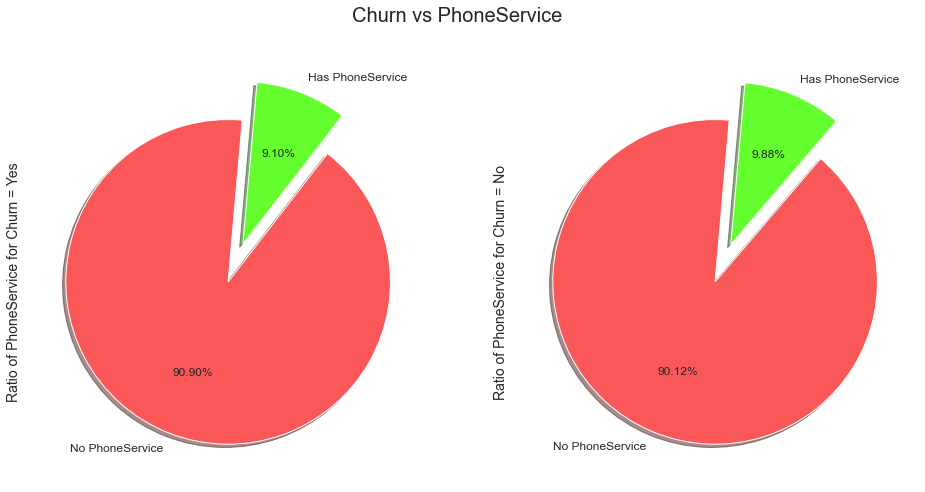

In [47]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "No PhoneService" ,"Has PhoneService"

plt.suptitle('Churn vs PhoneService', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["PhoneService"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=85)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of PhoneService for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["PhoneService"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=85)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of PhoneService for Churn = No', fontsize=14)

Text(0, 0.5, 'Ratio of MultipleLines for Churn = No')

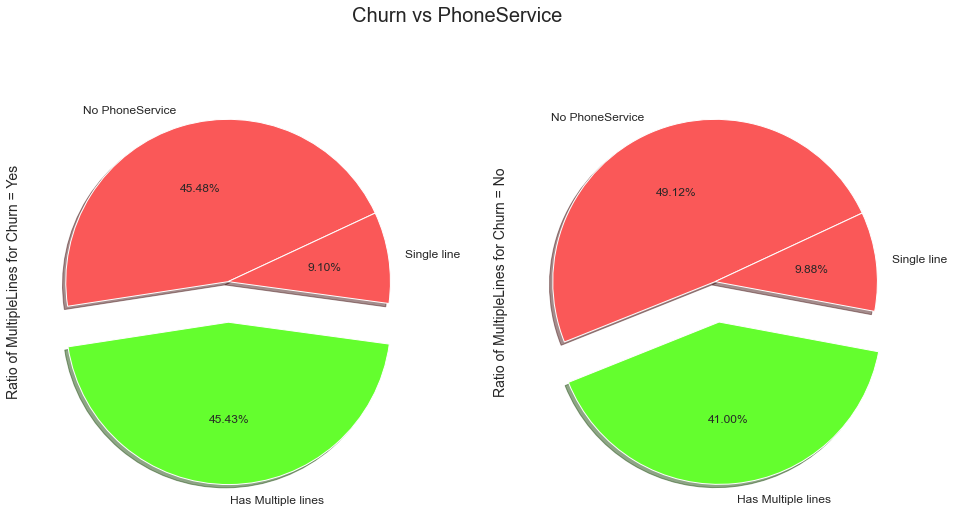

In [50]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "No PhoneService" ,"Has Multiple lines", "Single line"

plt.suptitle('Churn vs PhoneService', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["MultipleLines"].value_counts().plot.pie(explode=[0,0.25,0], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of MultipleLines for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["MultipleLines"].value_counts().plot.pie(explode=[0,0.25,0], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of MultipleLines for Churn = No', fontsize=14)

Text(0, 0.5, 'Ratio of InternetService for Churn = No')

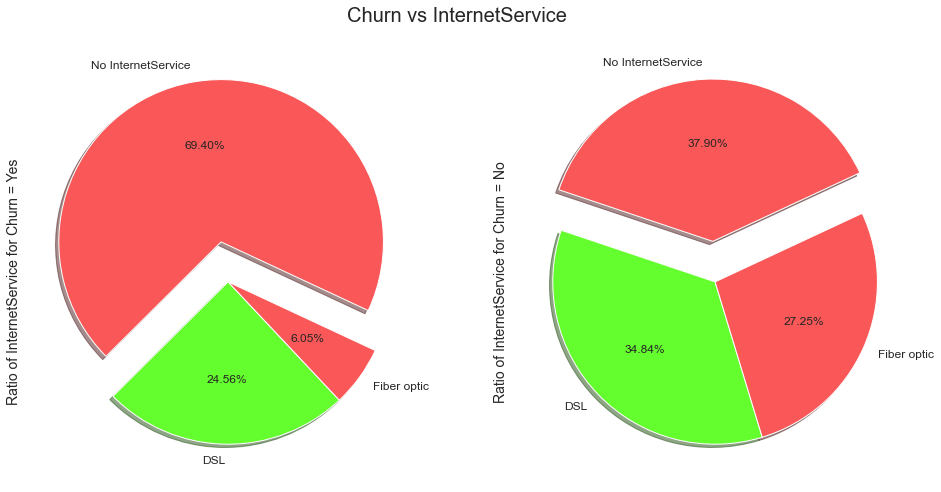

In [54]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels = "No InternetService" ,"DSL", "Fiber optic"

plt.suptitle('Churn vs InternetService', fontsize=20)

df_stg[df_stg["Churn"]=='Yes']["InternetService"].value_counts().plot.pie(explode=[0.25,0,0], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=-25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('Ratio of InternetService for Churn = Yes', fontsize=14)




df_stg[df_stg["Churn"]=='No']["InternetService"].value_counts().plot.pie(explode=[0.25,0,0], autopct='%1.2f%%', ax=ax[1], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[1].set_ylabel('Ratio of InternetService for Churn = No', fontsize=14)